In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
from matplotlib import pyplot as plt


<h1>The first thing that we would like to do is to acquisit the data from the web. I am scraping it from two main NBA-data sources: basketball-referance.com and basketball.realgm.com.
    </h1>

In [2]:
'''
*************************************************
First we take the headers of the html table (this will later be used as the columns label of our data frame)
*************************************************
'''

url = "https://www.basketball-reference.com/draft/NBA_2019.html".format(2019)
html = urlopen(url)
soup = BeautifulSoup(html)

soup.findAll('tr', limit=3)
headers = [th.getText() for th in soup.findAll('tr', limit=3)[1].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers


['Pk',
 'Tm',
 'Player',
 'College',
 'Yrs',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'FG%',
 '3P%',
 'FT%',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'WS',
 'WS/48',
 'BPM',
 'VORP']

In [3]:
'''
*************************************************
Next, we will iterate through all the data tables of the drafts from 1980 ti 2019 and retrive thire data
*************************************************
'''

total_players_stats_data = [] 
for year in range(1980,2019):
    # URL page we will scraping (see image above)
    url = "https://www.basketball-reference.com/draft/NBA_"+str(year)+".html".format(year)
    # this is the HTML from the given URL
    html = urlopen(url)
    soup = BeautifulSoup(html)
    rows = soup.findAll('tr')[0:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')]
                for i in range(len(rows))]
    player_stats=player_stats[2:]
    total_players_stats_data += player_stats
    

In [5]:
'''
*************************************************
Now sum it all up into a single data frame. this would be our first data source. 
*************************************************
'''
stats = pd.DataFrame(total_players_stats_data, columns = headers)
stats

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
0,1,GSW,Joe Barry Carroll,Purdue,10,705,22838,12455,5404,1264,...,.000,.747,32.4,17.7,7.7,1.8,35.6,.075,-0.6,8.2
1,2,UTA,Darrell Griffith,Louisville,10,765,21403,12391,2519,1627,...,.332,.707,28.0,16.2,3.3,2.1,22.0,.049,-1.4,3.4
2,3,BOS,Kevin McHale,Minnesota,13,971,30118,17335,7122,1670,...,.261,.798,31.0,17.9,7.3,1.7,113.0,.180,2.5,34.3
3,4,CHI,Kelvin Ransey,Ohio State,6,474,11586,5380,901,2480,...,.132,.782,24.4,11.4,1.9,5.2,17.9,.074,-0.9,3.3
4,5,DEN,James Ray,Jacksonville University,3,103,843,334,228,76,...,.333,.629,8.2,3.2,2.2,0.7,-0.3,-.017,-4.5,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,56,PHI,Ray Spalding,Louisville,1,14,148,54,48,5,...,.000,.333,10.6,3.9,3.4,0.4,0.2,.051,-5.1,-0.1
3606,57,OKC,Kevin Hervey,UT Arlington,1,7,19,2,2,1,...,.000,,2.7,0.3,0.3,0.1,-0.2,-.471,-19.9,-0.1
3607,58,DEN,Thomas Welsh,UCLA,1,11,36,18,4,5,...,.429,.500,3.3,1.6,0.4,0.5,0.1,.162,1.2,0.0
3608,59,PHO,George King,Colorado,1,1,6,0,1,0,...,,,6.0,0.0,1.0,0.0,0.0,-.001,-7.9,0.0


<h1>Ordering by VORP state</h1>
<h3> VORP - Value Over Replacement Player - is a statistical stat line that demonstrates how much a a player contributes to their team in comparison to a replacement-level player who is an average in its position. 
    for instance, Michael Jordan and Lebron James holds the highest VORP stat in NBA history </h3>

In [6]:
'''
*************************************************
Now sum it all up into a single data frame. this would be our first data source. 
*************************************************
'''

stats = stats.replace('', np.nan) 

stats.sort_values(by ="VORP", ascending=False).head(5)#.head(2000)[1378:]

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
1218,13,UTA,Karl Malone,Louisiana Tech,19,1476,54852,36928,14968,5248,...,.274,.742,37.2,25.0,10.1,3.6,234.6,.205,5.1,99.0
2146,5,MIN,Kevin Garnett,NaN,21,1462,50418,26071,14662,5445,...,.275,.789,34.5,17.8,10.0,3.7,191.4,.182,5.6,96.9
2262,1,SAS,Tim Duncan,Wake Forest,19,1392,47368,26496,15091,4225,...,.179,.696,34.0,19.0,10.8,3.0,206.4,.209,5.6,91.1
1865,4,ORL,Dennis Scott,Georgia Tech,10,629,17983,8094,1774,1296,...,.397,.793,28.6,12.9,2.8,2.1,33.4,.089,0.2,9.9
1926,9,ATL,Stacey Augmon,UNLV,15,1001,21658,7990,3216,1561,...,.152,.728,21.6,8.0,3.2,1.6,43.8,.097,-0.2,9.8


<h1>Ordering by WS/48 state</h1>

<h3> Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team . Meaning "how much a player is responsible for a win of his team.
   WS/48 is The Win Shares normalized into 48 minutes which is the length of an NBA game.</h3>
   <h4> additional and elaborated information about this stat line can be found here: </h4>
   
[Click](https://www.basketball-reference.com/about/ws.html)

In [7]:
stats.sort_values(by ="WS", ascending=False).head(20)

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
2088,3,DET,Grant Hill,Duke,18,1026,34776,17137,6169,4252,...,.314,.769,33.9,16.7,6.0,4.1,99.9,.138,3.0,43.6
1228,23,LAL,A.C. Green,Oregon State,16,1278,36552,12331,9473,1400,...,.254,.734,28.6,9.6,7.4,1.1,99.5,.131,-0.2,16.6
2202,1,PHI,Allen Iverson,Georgetown,14,914,37584,24368,3394,5624,...,.313,.780,41.1,26.7,3.7,6.2,99.0,.126,3.2,49.7
2270,9,TOR,Tracy McGrady,NaN,15,938,30658,18381,5276,4161,...,.338,.746,32.7,19.6,5.6,4.4,97.3,.152,5.2,55.7
2689,9,PHI,Andre Iguodala,Arizona,16,1122,37293,13517,5684,4849,...,.334,.709,33.2,12.0,5.1,4.3,96.8,.125,2.3,40.0
1831,26,LAL,Vlade Divac,NaN,16,1134,33838,13398,9326,3541,...,.235,.692,29.8,11.8,8.2,3.1,96.4,.137,2.3,36.3
2827,24,MEM,Kyle Lowry,Villanova,14,908,28682,13381,3905,5623,...,.366,.809,31.6,14.7,4.3,6.2,93.5,.157,3.2,38.0
1212,7,GSW,Chris Mullin,St. John's,16,986,32163,17911,4034,3450,...,.384,.865,32.6,18.2,4.1,3.5,93.1,.139,3.1,41.6
1560,7,CLE,Kevin Johnson,California,12,735,25061,13127,2404,6711,...,.305,.841,34.1,17.9,3.3,9.1,92.8,.178,3.9,37.3
2569,9,PHO,Amar'e Stoudemire,NaN,14,846,26254,15994,6632,1050,...,.236,.761,31.0,18.9,7.8,1.2,92.5,.169,1.3,22.0


<h1> And now on to the next - acquisit the data from basketball.realm : </h1>

In [8]:

# NBA season we will be analyzing
year = 2018
# URL page we will scraping (see image above)
url = "https://basketball.realgm.com/nba/draft/past_drafts/2019".format(year)
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)

'''
*************************************************
use findALL() to get the column headers
*************************************************
'''
soup.findAll('tr', limit=40)
# use getText()to extract the text we need into a list
headers_second = [th.getText() for th in soup.findAll('tr', limit=21)[20].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers_second = headers_second
headers_second

['Pick',
 'Player',
 'Team',
 'Draft Trades',
 'Pos',
 'HT',
 'WT',
 'Age',
 'YOS',
 'Pre-Draft Team',
 'Class',
 'Nationality']

In [9]:
'''
*************************************************
use findALL() to get the column headers
*************************************************
'''
from urllib.request import urlopen
from bs4 import BeautifulSoup

total_players_second_stats_data = []
# NBA season we will be analyzing
for year in range(1980,2019):
    # URL page we will scraping (see image above)
    url = "https://basketball.realgm.com/nba/draft/past_drafts/"+str(year).format(year)
    # this is the HTML from the given URL
    html = urlopen(url)
    soup = BeautifulSoup(html)

    rows = soup.findAll('tr')[19:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')]
                for i in range(len(rows))]
    player_stats=player_stats[2:]
    total_players_second_stats_data += player_stats
total_players_second_stats_data

[['1',
  'Joe Barry Carroll',
  'GOS',
  '',
  'FC',
  '7-0',
  '225',
  '21',
  '10',
  'Purdue',
  'Sr',
  'United States'],
 ['2',
  'Darrell Griffith',
  'UTH',
  '',
  'SG',
  '6-4',
  '190',
  '21',
  '10',
  'Louisville',
  'Sr',
  'United States'],
 ['3',
  'Kevin McHale',
  'BOS',
  '',
  'PF',
  '6-10',
  '210',
  '22',
  '14',
  'Minnesota',
  'Sr',
  'United States'],
 ['4',
  'Kelvin Ransey',
  'CHI',
  'CHI to POR',
  'G',
  '6-1',
  '170',
  '22',
  '6',
  'Ohio State',
  'Sr',
  'United States'],
 ['5',
  'James Ray',
  'DEN',
  '',
  'PF',
  '6-8',
  '215',
  '22',
  '3',
  'Jacksonville',
  'Sr',
  'United States'],
 ['6',
  "Mike O'Koren",
  'NJN',
  '',
  'GF',
  '6-7',
  '207',
  '22',
  '8',
  'North Carolina',
  'Sr',
  'United States'],
 ['7',
  'Mike Gminski',
  'NJN',
  '',
  'C',
  '6-11',
  '250',
  '20',
  '14',
  'Duke',
  'Sr',
  'United States'],
 ['8',
  'Andrew Toney',
  'PHL',
  '',
  'G',
  '6-3',
  '178',
  '22',
  '9',
  'Louisiana',
  'Sr',
  'Uni

In [11]:
len(total_players_second_stats_data)

4893

In [12]:

second_stats_data = pd.DataFrame(total_players_second_stats_data, columns = headers_second)
second_stats_data

,Pick,Player,Team,Draft Trades,Pos,HT,WT,Age,YOS,Pre-Draft Team,Class,Nationality
0,1,Joe Barry Carroll,GOS,,FC,7-0,225,21,10,Purdue,Sr,United States
1,2,Darrell Griffith,UTH,,SG,6-4,190,21,10,Louisville,Sr,United States
2,3,Kevin McHale,BOS,,PF,6-10,210,22,14,Minnesota,Sr,United States
3,4,Kelvin Ransey,CHI,CHI to POR,G,6-1,170,22,6,Ohio State,Sr,United States
4,5,James Ray,DEN,,PF,6-8,215,22,3,Jacksonville,Sr,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
4888,Brandon McCoy,C,7-0,250,20,0,UNLV,Fr *,United States,None,None,None
4889,Doral Moore,C,7-1,280,21,0,Wake Forest,Jr *,United States,None,None,None
4890,Malik Newman,SG,6-3,190,21,0,Kansas,So *,United States,None,None,None
4891,Nuni Omot,SF,6-9,205,23,0,Baylor,Sr,United States,None,None,None


<h1> Now that we got two seperated dataframes, we will merge them together to get single data source we could draw from</h1>

In [13]:
temp= stats.copy(deep=True)
temp.drop_duplicates('Player',inplace = True)
temp2 = second_stats_data.copy(deep = True)

In [14]:
temp2.drop(['Pre-Draft Team','Class','Nationality'],axis=1,inplace=True)
temp2.dropna(inplace=True)

In [15]:
df_merged = temp.merge(temp2,on='Player')


<h1>DATA Cleaning - In this portion we will clean and fill the data with values if needed </h1>

In [16]:
df_merged = df_merged.dropna(subset = ['VORP','WS','WS/48'])
df_merged['College'] = df_merged['College'].fillna('World')


array = np.array(df_merged['3P%'][df_merged['3P%'].notnull()])
array = array.astype(np.float)

threePoint_mean = array.mean()

array = np.array(stats['FT%'][stats['FT%'].notnull()])
array = array.astype(np.float)

ft_mean  = array.mean()

In [17]:
def fill_values_into_3pt(temp):

    if pd.isnull(temp):
        return threePoint_mean
    else:
        return temp

def fill_values_into_FT(temp):

    if pd.isnull(temp):
        return ft_mean
    else:
        return temp
    
def fill_values_into_age(array):
    
    if array == 'N/A':
        return '20'                                 #If there is no value, return the average age of a player drafting for the NBA
    else:
        return array

def conv_to_kg(weight):
    if(weight == '-'):
        return 100.69                                 #The average weight of an NBA player in KG
    return (float(weight)/2.204)

def conv_to_meters(height):
    height_temp = height.split('-')
    if((height_temp[0] != '7') and (height_temp[0] != '6') and (height_temp[0] != 5)):
        return 2.0066                                #if there is no hieght recored, return the average height of an NBA player
    height_feet = float(height_temp[0])
    height_inches = float(height_temp[1])
    return (height_feet*30.48)+(height_inches*2.54)  #The aurbetrery values of 30.48 CM = 1 FEET.   2.54 CM = 1 INCH


In [18]:
df_merged['3P%'] = df_merged['3P%'].apply(fill_values_into_3pt)
df_merged['FT%'] = df_merged['FT%'].apply(fill_values_into_FT)
df_merged['Age'] = df_merged['Age'].apply(fill_values_into_age)
df_merged['WT']  = df_merged['WT'].apply(conv_to_kg)
df_merged['HT']  = df_merged['HT'].apply(conv_to_meters)
df_merged['3P%'].fillna(value = 0.0, inplace = True)

C:\Users\IDO-PC\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
df_merged.drop(['Pk','Tm','Draft Trades'],axis=1,inplace=True)

In [20]:
df_merged.columns

Index(['Player', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%',
       '3P%', 'FT%', 'MP', 'PTS', 'TRB', 'AST', 'WS', 'WS/48', 'BPM', 'VORP',
       'Pick', 'Team', 'Pos', 'HT', 'WT', 'Age', 'YOS'],
      dtype='object')

In [21]:
df_merged

,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,...,WS/48,BPM,VORP,Pick,Team,Pos,HT,WT,Age,YOS
0,Joe Barry Carroll,Purdue,10,705,22838,12455,5404,1264,.474,.000,...,.075,-0.6,8.2,1,GOS,FC,213.36,102.087114,21,10
1,Darrell Griffith,Louisville,10,765,21403,12391,2519,1627,.463,.332,...,.049,-1.4,3.4,2,UTH,SG,193.04,86.206897,21,10
2,Kevin McHale,Minnesota,13,971,30118,17335,7122,1670,.554,.261,...,.180,2.5,34.3,3,BOS,PF,208.28,95.281307,22,14
3,Kelvin Ransey,Ohio State,6,474,11586,5380,901,2480,.454,.132,...,.074,-0.9,3.3,4,CHI,G,185.42,77.132486,22,6
4,James Ray,Jacksonville University,3,103,843,334,228,76,.428,.333,...,-.017,-4.5,-0.6,5,DEN,PF,203.20,97.549909,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Shake Milton,SMU,2,52,879,390,103,89,.467,.413,...,.111,-1.2,0.2,54,DAL,SG,198.12,93.920145,21,1
3194,Kevin Hervey,UT Arlington,1,7,19,2,2,1,.091,.000,...,-.471,-19.9,-0.1,57,OKC,PF,205.74,104.355717,21,0
3195,Thomas Welsh,UCLA,1,11,36,18,4,5,.538,.429,...,.162,1.2,0.0,58,DEN,C,213.36,115.698730,22,1
3196,George King,Colorado,1,1,6,0,1,0,NaN,0.2477,...,-.001,-7.9,0.0,59,PHX,SF,198.12,99.818512,24,1


<h1>Exploratory </h1>

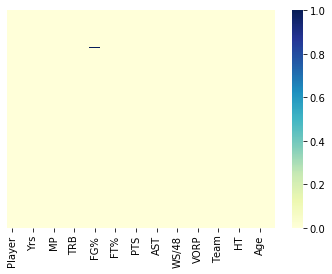

In [22]:

#Check the integrity of the data
sns.heatmap(df_merged.isnull(),yticklabels=False, cmap="YlGnBu")

<h3> The disterbution of the 3-Point-shot precentage among the players </h3>

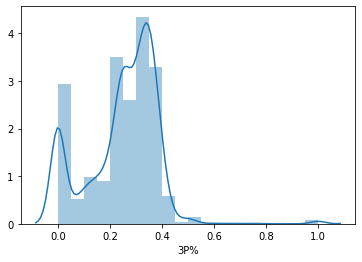

In [24]:
sns.distplot(df_merged["3P%"], bins = 20)

<h3> The disterbution of the field-goal-shot(every shot taken by the player on the court) precentage among the players </h3>

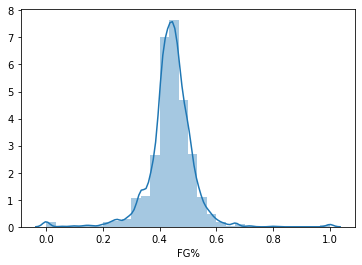

In [23]:
sns.distplot(df_merged["FG%"], bins = 30)

In [25]:
display_world_by_us = df_merged.copy(deep = True)          #We are going to change the data so do it on a copy


In [26]:
def fill_values_into_college(array):
    college = array
    
    if college != 'World':
        return 'USA'
    else:
        return college

In [27]:
display_world_by_us['College'] = display_world_by_us['College'].apply(fill_values_into_college)
display_world_by_us


,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,...,WS/48,BPM,VORP,Pick,Team,Pos,HT,WT,Age,YOS
0,Joe Barry Carroll,USA,10,705,22838,12455,5404,1264,.474,.000,...,.075,-0.6,8.2,1,GOS,FC,213.36,102.087114,21,10
1,Darrell Griffith,USA,10,765,21403,12391,2519,1627,.463,.332,...,.049,-1.4,3.4,2,UTH,SG,193.04,86.206897,21,10
2,Kevin McHale,USA,13,971,30118,17335,7122,1670,.554,.261,...,.180,2.5,34.3,3,BOS,PF,208.28,95.281307,22,14
3,Kelvin Ransey,USA,6,474,11586,5380,901,2480,.454,.132,...,.074,-0.9,3.3,4,CHI,G,185.42,77.132486,22,6
4,James Ray,USA,3,103,843,334,228,76,.428,.333,...,-.017,-4.5,-0.6,5,DEN,PF,203.20,97.549909,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Shake Milton,USA,2,52,879,390,103,89,.467,.413,...,.111,-1.2,0.2,54,DAL,SG,198.12,93.920145,21,1
3194,Kevin Hervey,USA,1,7,19,2,2,1,.091,.000,...,-.471,-19.9,-0.1,57,OKC,PF,205.74,104.355717,21,0
3195,Thomas Welsh,USA,1,11,36,18,4,5,.538,.429,...,.162,1.2,0.0,58,DEN,C,213.36,115.698730,22,1
3196,George King,USA,1,1,6,0,1,0,NaN,0.2477,...,-.001,-7.9,0.0,59,PHX,SF,198.12,99.818512,24,1


<h1>The distribution of foreign players in the drafts </h1>

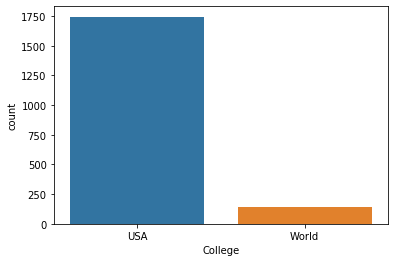

In [28]:

sns.countplot(x='College',data = display_world_by_us)

<h3> As you can see during the last 40 years, the major of players that were drafted to the NBA in the last 30 years were from within the United States</h3>

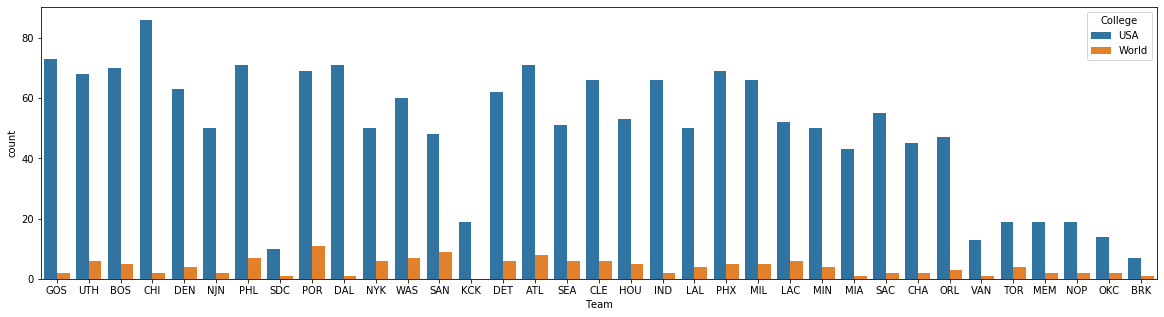

In [29]:
from matplotlib import pyplot



#display_world_by_us = display_world_by_us.replace({'College':'USA'},inplace=True)

#stats_temp['College'].
fig,ax = pyplot.subplots(figsize= (20,5))
sns.countplot(x='Team',hue='College',data = display_world_by_us)

<h3> After looking into the data more cerfully, we can see that certain NBA teams, like the Portlan "Trail Blazers" and the Phinix "Suns" were more tendius to draft players from abroud than other teams. (Like Chicago or Indiana) </h3>

<h1> The distribution of 3 point shooting percentage among the players in draft based on their height.</h1>
<h2> This is on par with the fact that taller player tend to build their game base on their strength and height, therefor they will take less shots that are further away from the basket - meaning they will work less on their 3 point shot. hence their 3 point shot percentage will be lessen or practically zero. </h2>

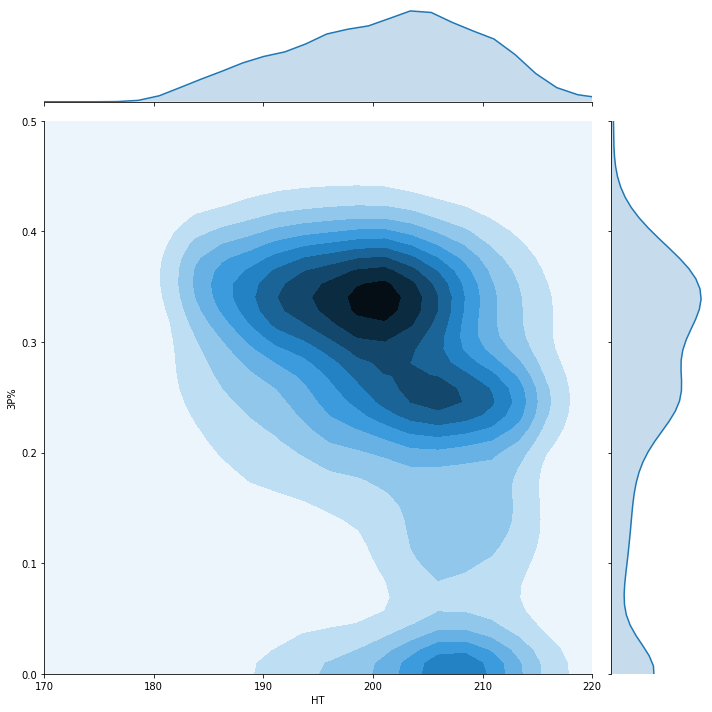

In [30]:
df_merged['3P%'] = df_merged['3P%'].astype(str)
#Intitial data exploring to see how some important features interact with WS
#df_merged.plot(x = 'Pick', y = 'WS', kind = 'scatter',xticks = (0,30) ,yticks = (-1.0,2.0))
sns.jointplot(x='HT',y='3P%',data=df_merged,kind = "kde", xlim=[170,220] , ylim= [0,0.5],height = 10)

<h1> The distribution of 3 point shooting percentage among the players in draft based on their draft pick.</h1>
<h2> Here we can see that players that are being picked in the top picks selection tend to shot really well, compared with player that are selected in later picks </h2>

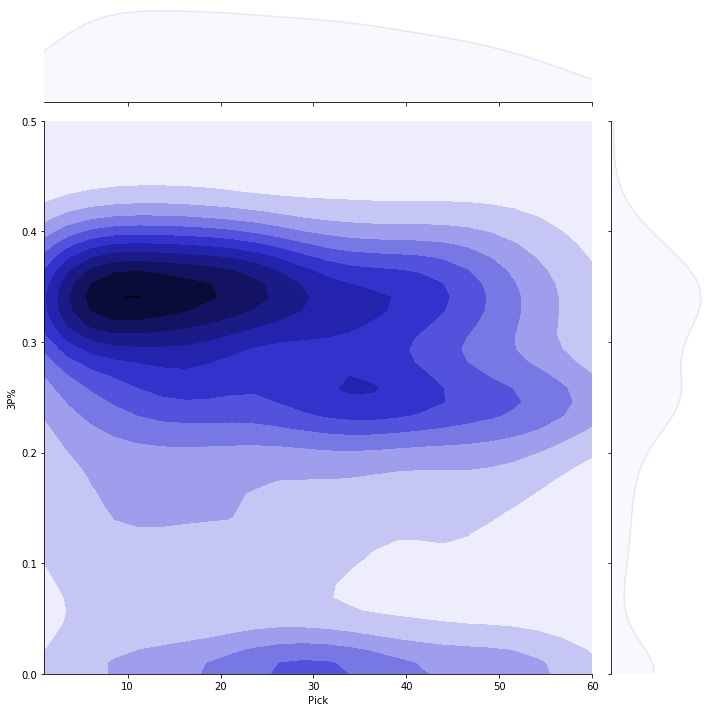

In [31]:
df_merged['Pick'].fillna('0')

#Intitial data exploring to see how some important features interact with WS
sns.jointplot(x='Pick',y='3P%',data=df_merged,kind = "kde",color = 'lavender', xlim=[1,60] ,ylim=[0.0,0.5],height = 10)

<h1> The win share - as mentioned earlier, an attempt to measure a success to the individuals on the entire team. </h1>
<h1>Here are the win shares normalized to 48 minutes (a full game length) visualization, based on a player picks </h1>
<h2>Is sensible that players that were selected in higher picks will make their respective teams more successful and thus will have a higher WS/48 stats </h2>

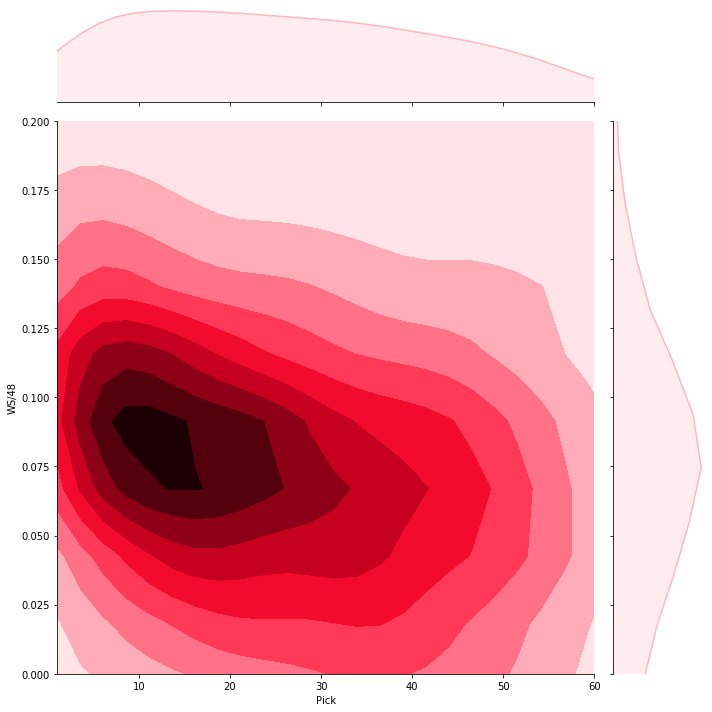

In [32]:

#sns.joinplot(y='VORP',x='FG%',data = df_merged,palette='rainbow')
sns.jointplot(y='WS/48',x='Pick',data=df_merged,kind = "kde",color = 'lightpink', xlim=[1,60] ,ylim=[0.0,0.2],height = 10)

<h1> A ploting of Win shares versus Prospect's Age</h1>

<Figure size 720x576 with 0 Axes>

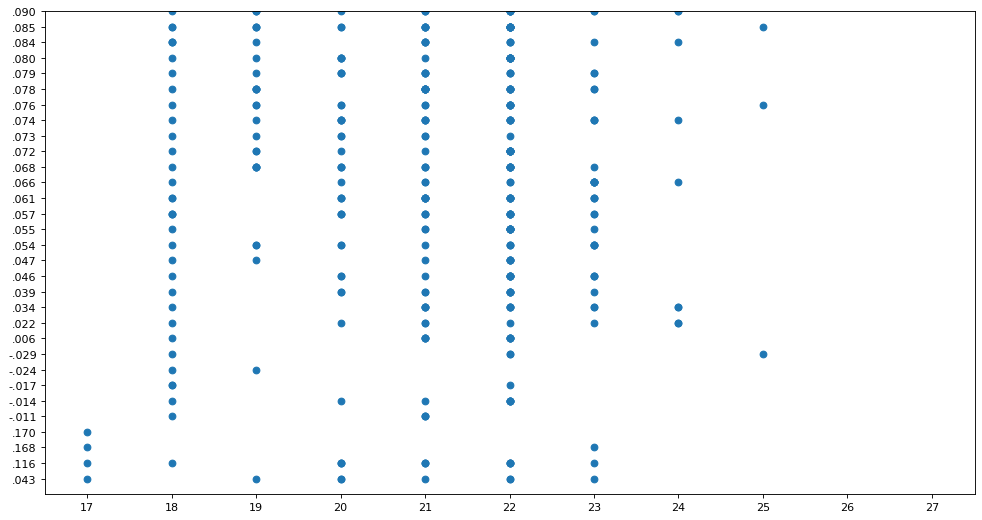

In [33]:
plt.figure(figsize=(10,8))

lists = sorted(zip(*[df_merged['Age'], df_merged['WS/48']]))
new_x, new_y = list(zip(*lists))

# Plot
import matplotlib.pylab as plt
plt.figure(figsize=(15,8), dpi=80)
plt.ylim((-1, 30))
plt.scatter(new_x, new_y)
plt.show()